# Red neuronal de funcion de base radial (RBF-NN)

La funcion de base radial es una funcion que tiene un eje de simetría

<img src="images/funcionBaseRadial.jpg" width="800">

Estas redes no necesitan sesgo, el centro de la funcion ya funciona como sesgo

<img src="images/sesgosRBFNN.jpg" width="600" height="400">

Esta red solo puede tener una capa oculta, y en la capa salida si se pueden poner mas neuronas(normalmente lineales)

### K-means

Algoritmo de clustering no supervisado de salida discreta

s es el cluster, por cada cluster lo que hace es por cada punto del cluster minimiza la distancia a la media

<img src="images/kmedias.jpg" width="800">

##### Algorito de lloyd

Asignacion: por cada punto verifica a cual media(cluster) está mas cerca el punto y lo asigna a la media(cluster) mas cercana

Actualizacion: Todos los puntos asignado al cluster son usados para sacar el promedio dedistancia al cluster y se actualiza el centro del cluster
<img src="images/algLLoyd.jpg" width="800">

## Entrenamiento

Para las predicciones se usa la funcion de toda la vida

GM * W = Y_est

para actualizar se usa la pseudo inversa normalita
W= G**(+)M

# Código

In [2]:
import numpy as np
from scipy.spatial import distance
from sklearn.cluster import KMeans

class RBFNN:
    def __init__(self, h_hidden=15):
        self.nh = h_hidden
        
    def predict(self, X):
        G=np.exp(-(distance.cdist(X, self.C))**2 / self.sigma**2)
        return G @ self.w
    
    def predict_class(self, X):
        G=np.exp(-(distance.cdist(X, self.C))**2 / self.sigma**2)
        return np.argmax(G @ self.w)
    
    def train(self, X, Y):
        #Entrenamiento primer capa
        self.ni , self.no = X.shape[1], Y.shape[1]
        km = KMeans(n_clusters=self.nh).fit(X) #Encuentra los centros de los clusters
        self.C = km.cluster_centers_
        
        #Encontrar la sigma para entrenar la capa salida
        self.sigma = (self.C.max() - self.C.min()) / (np.sqrt(2*self.nh))
        
        G=np.exp(-(distance.cdist(X, self.C))**2 / self.sigma**2) #Se calcula G, las salidas de las funciones gausianas
        self.w = np.linalg.pinv(G) @ Y #crea las w con la pseudoinversa

### Ejemplo 1

In [3]:
p = 500 
xl, xu = -5, 5

x = np.linspace(xl, xu, p).reshape(-1, 1)

y = 2 * np.cos(x) + np.sin(3*x) + 5 + 0.2*np.random.randn(*x.shape)

### Ejemplo 2

In [6]:
p = 500 
xl, xu = 0, 10

x = np.linspace(xl, xu, p).reshape(-1, 1)

y = (0.1 * x -0.5) * np.sin(1/ (0.1*x -0.5))

holaaa


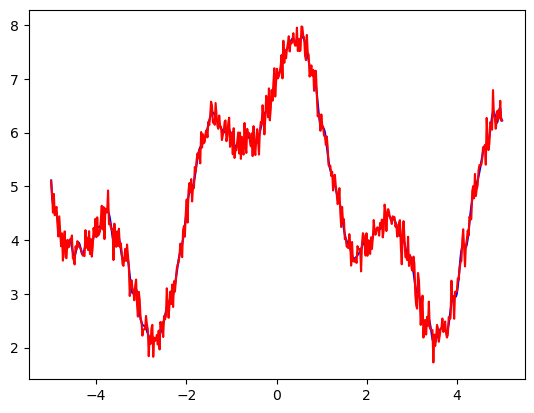

In [15]:
#crear y entrenar la red
print("holaaa")
neurons = 480
net = RBFNN(neurons)
net.train(x,y)

import matplotlib.pyplot as plt
xnew = np.linspace(xl, xu, p).reshape(-1,1)
ynew = net.predict(xnew)
plt.plot(xnew, ynew, '-b')

plt.plot(x, y, '-r')
plt.show()